In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, time
sys.path.insert(1, '../discrete_mixflows/')
from discrete_mixflows import *
from gibbs import *
from concrete import *

plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams["figure.figsize"]=15,7.5
plt.rcParams.update({'font.size': 24})

In [2]:
########################
########################
# target specification #
########################
########################
np.random.seed(2023)
K1=4
K2=5
prbs=np.random.rand(K1,K2)
prbs=prbs/np.sum(prbs)
def lp(x,axis=None):
    # compute the univariate log joint and conditional target pmfs
    #
    # inputs:
    #    x    : (2,d) array with state values
    #    axis : int, full conditional to calculate; returns joint if None
    # outputs:
    #   ext_lprb : if axis is None, (d,) array with log joint; else, (d,K_{axis+1}) array with d conditionals 
    
    ext_lprb=np.log(np.moveaxis(np.repeat(prbs[:,:,np.newaxis],x.shape[1],axis=-1),2,0)) # stack d copies of logp vertically
    if axis==None: return np.squeeze(ext_lprb[np.arange(0,x.shape[1]),x[0,:],x[1,:]]) # for each d, return lp(x)
    if axis==0: return ext_lprb[np.arange(0,x.shape[1]),:,x[1,:]]
    if axis==1: return ext_lprb[np.arange(0,x.shape[1]),x[0,:],:]
    raise Exception("Axis out of bounds - there aren't that many variables")

In [44]:
temp=0.5
depth=50
layer=128
maxiters=5001
tmp_flow,tmp_loss=trainRealNVP(
                temp=temp,depth=depth,lprbs=np.log(prbs).flatten(),layers=layer,max_iters=maxiters,lr=1e-2,seed=2023
            )

iter 0: loss = 5769103.500
iter 500: loss = 154.740
iter 1000: loss = 115.278
iter 1500: loss = 92.332
iter 2000: loss = 72.574
iter 2500: loss = 63.602
iter 3000: loss = 55.593
iter 3500: loss = 53.796
iter 4000: loss = 49.595
iter 4500: loss = 50.009
iter 5000: loss = 47.208


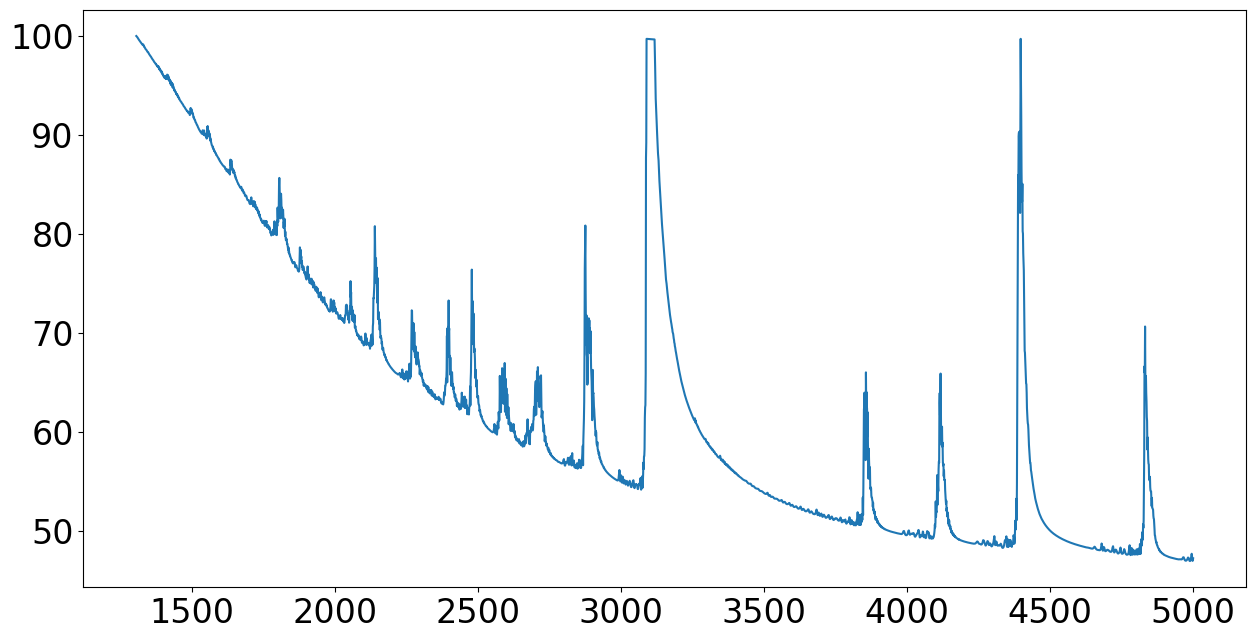

In [45]:
threshold=100
plt.plot(np.arange(0,maxiters)[tmp_loss<threshold],tmp_loss[tmp_loss<threshold])

In [46]:
sample_size=1000
tmp_sample=tmp_flow.sample(sample_size)
tmp_sample=np.exp(np.squeeze(tmp_sample.detach().numpy())) # expConcrete->Concrete
tmp_sample=tmp_sample/np.sum(tmp_sample,axis=-1)[:,np.newaxis] # normalize probs
tmp_sample=np.argmax(tmp_sample,axis=-1) # rounding Concrete
tmp_sample=idx_unflatten(tmp_sample,K2) # 1d->2d

/var/folders/k3/24b0dzl557v5m0_0658q2cxr0000gn/T/ipykernel_95174/3120223486.py:3: RuntimeWarning: overflow encountered in exp
  tmp_sample=np.exp(np.squeeze(tmp_sample.detach().numpy())) # expConcrete->Concrete
/var/folders/k3/24b0dzl557v5m0_0658q2cxr0000gn/T/ipykernel_95174/3120223486.py:4: RuntimeWarning: invalid value encountered in divide
  tmp_sample=tmp_sample/np.sum(tmp_sample,axis=-1)[:,np.newaxis] # normalize probs


In [47]:
tmp_density=plt.hist2d(tmp_sample[0,:],tmp_sample[1,:],density=True,
                         bins=[np.arange(0,K1+1),np.arange(0,K2+1)])[0]
plt.clf()

<Figure size 1500x750 with 0 Axes>

In [48]:
print(prbs)
print(tmp_density)

[[0.04394993 0.12153859 0.08026644 0.01727979 0.01929243]
 [0.06386561 0.00301514 0.09926967 0.07157647 0.07438117]
 [0.06229286 0.06843638 0.05384315 0.02063433 0.04925781]
 [0.02212277 0.04612981 0.0246133  0.05336854 0.00486582]]
[[0.254 0.013 0.085 0.003 0.018]
 [0.117 0.001 0.072 0.075 0.068]
 [0.    0.04  0.09  0.    0.034]
 [0.008 0.028 0.014 0.078 0.002]]


Text(0, 0.5, 'probability')

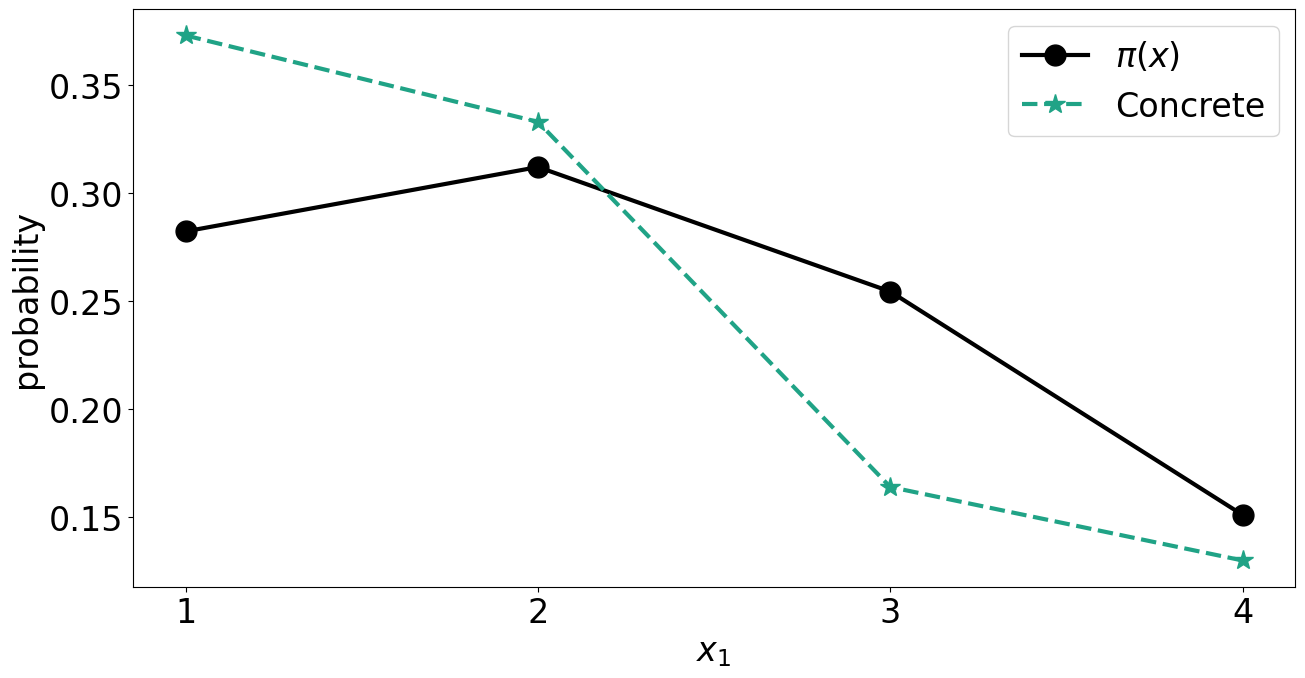

In [49]:
########################
########################
#   plot x1 results    #
########################
########################

ttx=np.arange(0,K1)
plt.plot(ttx+0.5,np.sum(prbs,axis=1),c="black", label=r'$\pi(x)$',lw=3,ms=15,marker='o')
plt.plot(ttx+0.5,np.sum(tmp_density,axis=1),c='#20A386FF', label=r'Concrete',lw=3,ls='dashed',ms=15,marker='*')
plt.legend()
plt.xlabel(r'$x_1$')
plt.xticks(ticks=np.arange(0,K1)+0.5,labels=np.arange(1,1+K1))
plt.ylabel('probability')

Text(0, 0.5, 'probability')

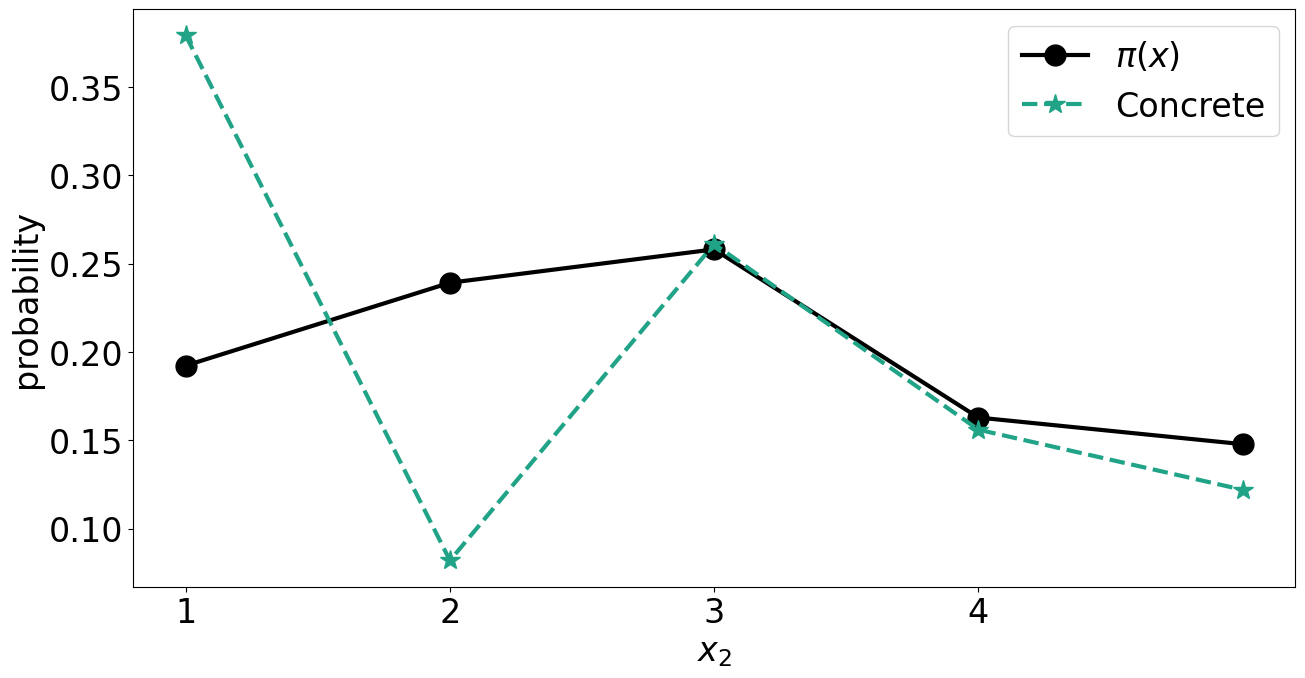

In [50]:
########################
########################
#   plot x2 results    #
########################
########################

ttx=np.arange(0,K2)
plt.plot(ttx+0.5,np.sum(prbs,axis=0),c="black", label=r'$\pi(x)$',lw=3,ms=15,marker='o')
plt.plot(ttx+0.5,np.sum(tmp_density,axis=0),c='#20A386FF', label=r'Concrete',lw=3,ls='dashed',ms=15,marker='*')
plt.legend()
plt.xlabel(r'$x_2$')
plt.xticks(ticks=np.arange(0,K1)+0.5,labels=np.arange(1,1+K1))
plt.ylabel('probability')